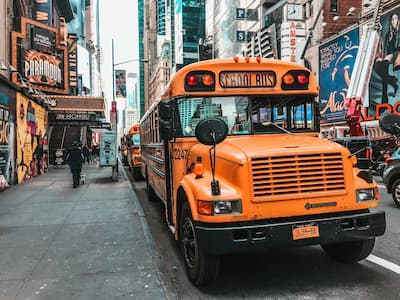

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [2]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [7]:
#Finding schools with the best math scores
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [9]:
#Calculating the total_SAT
schools["total_SAT"] = schools[["average_math", "average_reading", "average_writing"]].sum(axis=1)
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


In [14]:
#Identifying the top 10 performing schools
top_10_schools = schools.groupby("school_name", as_index=False)["total_SAT"].mean().sort_values("total_SAT", ascending=False).head(10).reset_index()
top_10_schools

,index,school_name,total_SAT
0,325,Stuyvesant High School,2144.0
1,324,Staten Island Technical High School,2041.0
2,55,Bronx High School of Science,2041.0
3,188,High School of American Studies at Lehman College,2013.0
4,334,Townsend Harris High School,1981.0
5,293,Queens High School for the Sciences at York Co...,1947.0
6,30,Bard High School Early College,1914.0
7,83,Brooklyn Technical High School,1896.0
8,121,Eleanor Roosevelt High School,1889.0
9,180,"High School for Mathematics, Science, and Engi...",1889.0


In [15]:
#Grouping the data by borough
Boroughs = schools.groupby('borough')['total_SAT'].agg(["count", "mean", "std"]).round(2)
Boroughs

,count,mean,std
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


In [16]:
#Filtering for the largest standard deviation
largest_std_dev = Boroughs[Boroughs["std"] == Boroughs["std"].max()]
largest_std_dev

,count,mean,std
borough,,,
Manhattan,89,1340.13,230.29


In [18]:
#Renaming columns
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
